In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

In [33]:
path = "~/Documents/Career Foundry/specialization/Data Sets"

In [34]:
df = pd.read_pickle(os.path.join(path, 'Dataset_scaled.pkl'))

In [35]:
answers = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413100 entries, 0 to 413099
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              413100 non-null  datetime64[ns]
 1   MONTH             413100 non-null  int64         
 2   city              413100 non-null  object        
 3   cloud_cover       367200 non-null  float64       
 4   global_radiation  367200 non-null  float64       
 5   humidity          390150 non-null  float64       
 6   precipitation     390150 non-null  float64       
 7   pressure          367200 non-null  float64       
 8   snow_depth        160650 non-null  float64       
 9   sunshine          367200 non-null  float64       
 10  temp_max          390150 non-null  float64       
 11  temp_mean         413100 non-null  float64       
 12  temp_min          390150 non-null  float64       
 13  wind_speed        252450 non-null  float64       
dtypes: d

In [37]:
climate = df[~df['city'].isin(['GDANSK','ROMA','TOURS'])]

In [38]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 344250 entries, 0 to 413099
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              344250 non-null  datetime64[ns]
 1   MONTH             344250 non-null  int64         
 2   city              344250 non-null  object        
 3   cloud_cover       321300 non-null  float64       
 4   global_radiation  344250 non-null  float64       
 5   humidity          321300 non-null  float64       
 6   precipitation     344250 non-null  float64       
 7   pressure          321300 non-null  float64       
 8   snow_depth        137700 non-null  float64       
 9   sunshine          344250 non-null  float64       
 10  temp_max          344250 non-null  float64       
 11  temp_mean         344250 non-null  float64       
 12  temp_min          344250 non-null  float64       
 13  wind_speed        206550 non-null  float64       
dtypes: dateti

In [39]:
climate.isna().sum()

metric
DATE                     0
MONTH                    0
city                     0
cloud_cover          22950
global_radiation         0
humidity             22950
precipitation            0
pressure             22950
snow_depth          206550
sunshine                 0
temp_max                 0
temp_mean                0
temp_min                 0
wind_speed          137700
dtype: int64

In [40]:
climate = climate.copy()

In [41]:
climate.drop(columns=['wind_speed', 'snow_depth', 'pressure', 'cloud_cover'], inplace=True)

In [64]:
climate[climate['humidity'].isna()]

,DATE,MONTH,city,global_radiation,humidity,precipitation,sunshine,temp_max,temp_mean,temp_min,humidity_median
13,1960-01-01,1,STOCKHOLM,-1.307901,NaN,0.167854,-1.173626,-0.898060,-0.665097,-0.452413,NaN
28,1960-01-02,1,STOCKHOLM,-1.307901,NaN,-0.313620,-1.173626,-0.887528,-0.689124,-0.346354,NaN
43,1960-01-03,1,STOCKHOLM,-1.307901,NaN,-0.387693,-1.173626,-0.982319,-0.881337,-0.571730,NaN
58,1960-01-04,1,STOCKHOLM,-1.307901,NaN,-0.424729,-1.173626,-1.171900,-1.025498,-0.691047,NaN
73,1960-01-05,1,STOCKHOLM,-1.307901,NaN,2.019678,-1.173626,-0.961254,-0.773217,-0.638017,NaN
...,...,...,...,...,...,...,...,...,...,...,...
344188,2022-10-27,10,STOCKHOLM,-0.218682,NaN,-0.165474,-0.419025,0.081443,0.211878,0.343033,NaN
344203,2022-10-28,10,STOCKHOLM,-0.218682,NaN,-0.165474,-0.984976,0.091976,0.332011,0.714241,NaN
344218,2022-10-29,10,STOCKHOLM,-0.218682,NaN,-0.165474,0.453482,0.102508,0.404091,0.860073,NaN
344233,2022-10-30,10,STOCKHOLM,-0.218682,NaN,-0.165474,0.807201,-0.108138,-0.268656,-0.067948,NaN


In [42]:
oslo_humidity = climate[climate['city'] == 'OSLO'].set_index('DATE')['humidity']
climate.loc[climate['city'] == 'STOCKHOLM', 'humidity'] = climate.loc[climate['city'] == 'STOCKHOLM', 'DATE'].map(oslo_humidity)

In [43]:
climate.isna().sum()

metric
DATE                0
MONTH               0
city                0
global_radiation    0
humidity            0
precipitation       0
sunshine            0
temp_max            0
temp_mean           0
temp_min            0
dtype: int64

In [44]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 344250 entries, 0 to 413099
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              344250 non-null  datetime64[ns]
 1   MONTH             344250 non-null  int64         
 2   city              344250 non-null  object        
 3   global_radiation  344250 non-null  float64       
 4   humidity          344250 non-null  float64       
 5   precipitation     344250 non-null  float64       
 6   sunshine          344250 non-null  float64       
 7   temp_max          344250 non-null  float64       
 8   temp_mean         344250 non-null  float64       
 9   temp_min          344250 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 28.9+ MB


In [45]:
answers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22950 entries, 0 to 22949
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   DATE                         22950 non-null  int64
 1   BASEL_pleasant_weather       22950 non-null  int64
 2   BELGRADE_pleasant_weather    22950 non-null  int64
 3   BUDAPEST_pleasant_weather    22950 non-null  int64
 4   DEBILT_pleasant_weather      22950 non-null  int64
 5   DUSSELDORF_pleasant_weather  22950 non-null  int64
 6   HEATHROW_pleasant_weather    22950 non-null  int64
 7   KASSEL_pleasant_weather      22950 non-null  int64
 8   LJUBLJANA_pleasant_weather   22950 non-null  int64
 9   MAASTRICHT_pleasant_weather  22950 non-null  int64
 10  MADRID_pleasant_weather      22950 non-null  int64
 11  MUNCHENB_pleasant_weather    22950 non-null  int64
 12  OSLO_pleasant_weather        22950 non-null  int64
 13  SONNBLICK_pleasant_weather   22950 non-null  i

In [46]:
answers.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
# Convert from wide format to long format using melt
ans_long = answers.melt(id_vars=['DATE'], 
                 var_name='city_metric', 
                 value_name='value')

# Split city name from variables and pivot them into new columns
ans_long[['city', 'metric']] = ans_long['city_metric'].str.split('_', n=1, expand=True)
ans_long = ans_long.drop('city_metric', axis=1).pivot_table(
   index=['DATE', 'city'], 
   columns='metric', 
   values='value', 
   aggfunc='first'
).reset_index()

In [48]:
ans_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344250 entries, 0 to 344249
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   DATE              344250 non-null  int64 
 1   city              344250 non-null  object
 2   pleasant_weather  344250 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 7.9+ MB


In [49]:
ans_long['DATE'] = pd.to_datetime(ans_long['DATE'], format='%Y%m%d', errors='coerce')

In [50]:
climate = climate.sort_values(['DATE','city']).reset_index(drop=True)
pleasant = ans_long.sort_values(['DATE','city']).reset_index(drop=True)

In [64]:
plot = climate.merge(pleasant, on=['DATE','city'])

In [67]:
madrid = plot[plot['city']=='MADRID'].sample(n=5000, random_state=42)

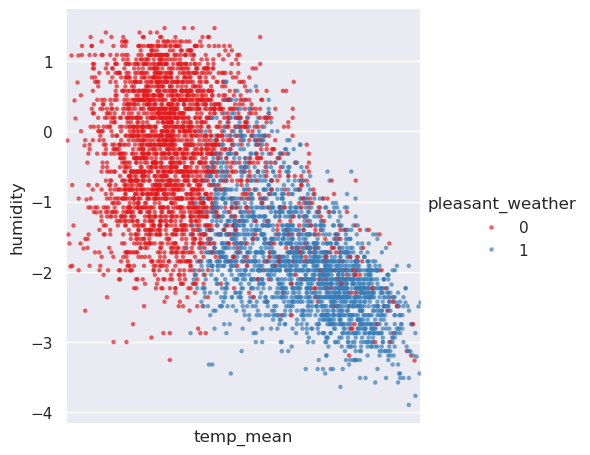

In [78]:
sns.set_theme()
g = sns.catplot(x="temp_mean", y="humidity", hue="pleasant_weather", s=10, alpha=0.7, palette='Set1', data=madrid)
g.set_xticklabels([], visible=False)

In [51]:
#Create an 'X' matrix by dropping the unneeded columns.
X = climate.drop(['DATE', 'MONTH', 'city'], axis=1)
y = pleasant.pleasant_weather

In [52]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [54]:
#Run the model with neighbors equal to 1 to 5, test the accuracy
k_range = np.arange(1,5)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1)
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train))
    test_acc[i] = knn.score(X_test, np.array(y_test))

i - 0
k - [1 2 3 4]
i - 1
k - [1 2 3 4]
i - 2
k - [1 2 3 4]
i - 3
k - [1 2 3 4]


<function matplotlib.pyplot.show(close=None, block=None)>

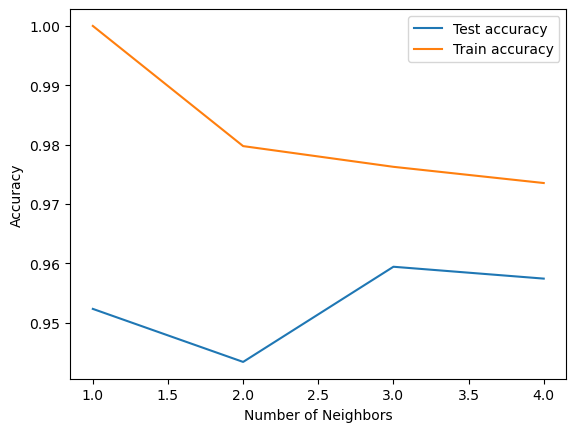

In [55]:
#plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

In [83]:
test_acc[2]

0.9594250723307345

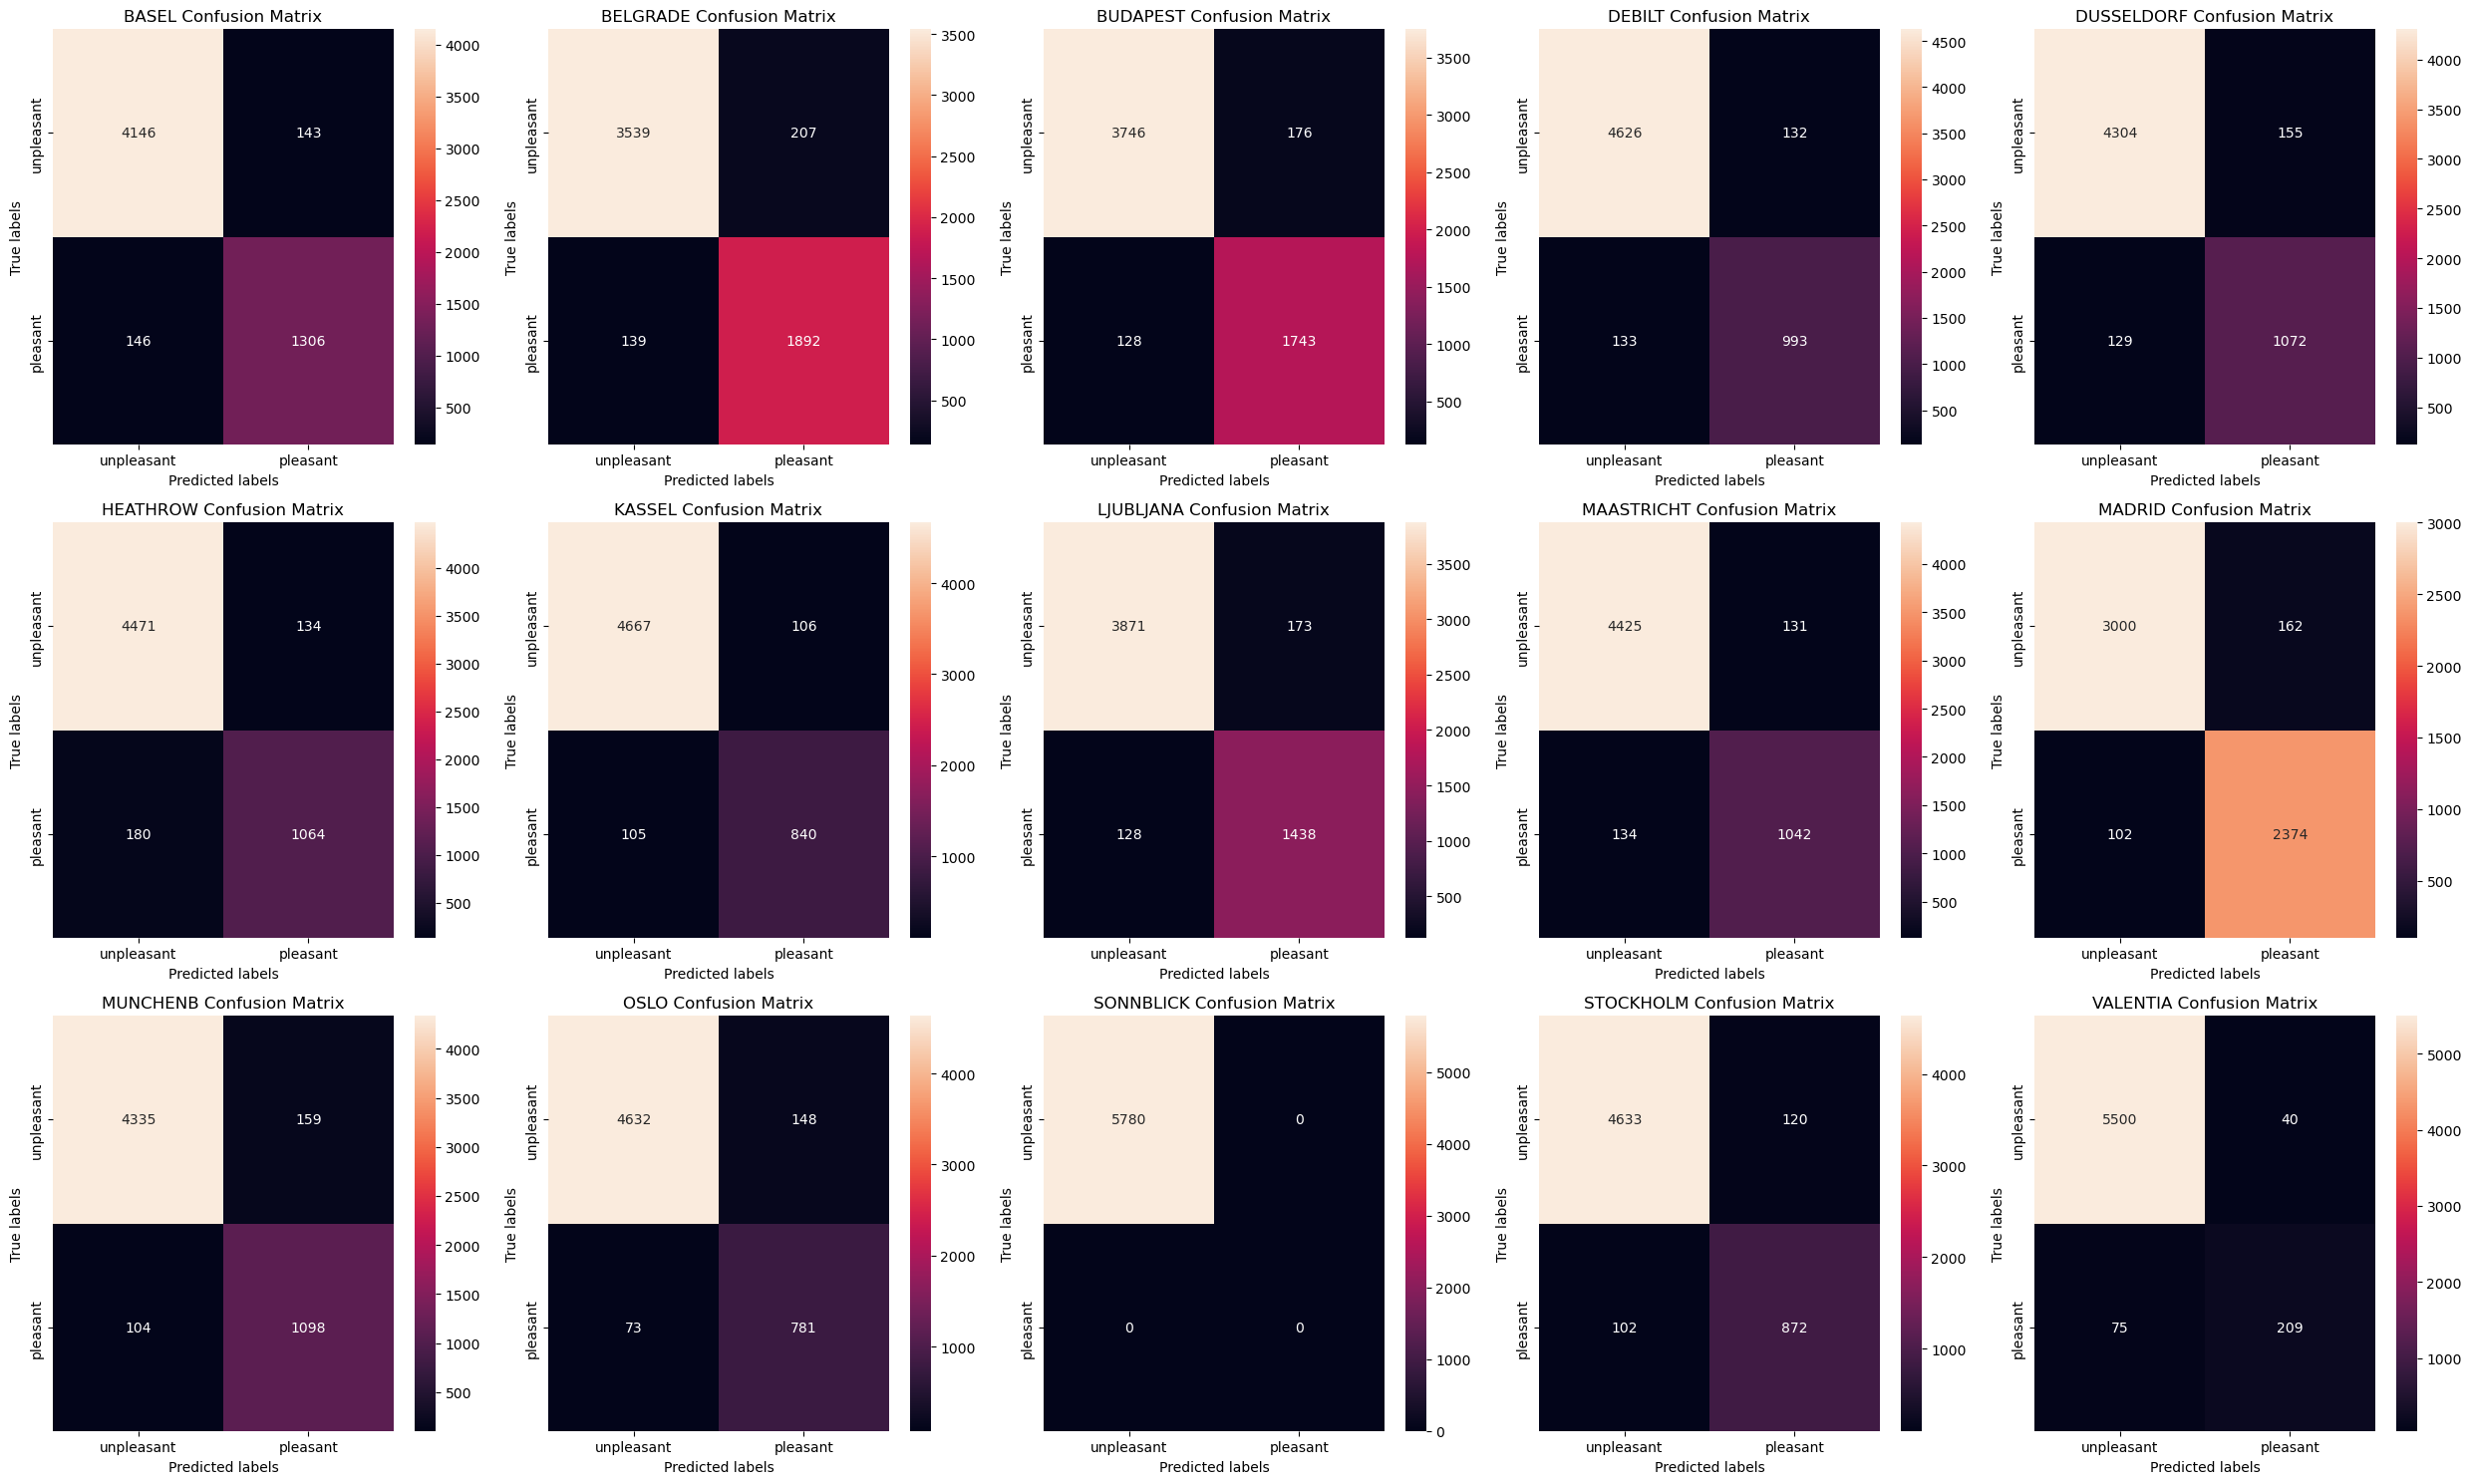

In [63]:
city_test = pleasant.loc[y_test.index, 'city']
cities = city_test.unique()
cities.sort()

figure, ax = plt.subplots(3, 5, figsize=(25, 15))
labels = ['unpleasant', 'pleasant']   
count = 0

for i in range(3):
    for j in range(5):
        if count < len(cities):
            city_name = cities[count]
            
            # Filter data for current city
            city_mask = city_test == city_name
            y_true_city = y_test[city_mask]
            y_pred_city = y_pred[city_mask]
            
            # Create confusion matrix with explicit labels to ensure 2x2 matrix
            cm = confusion_matrix(y_true_city, y_pred_city, labels=[0, 1])
            
            # Plot heatmap
            sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j], 
                       xticklabels=labels, yticklabels=labels)
            
            # Labels, title and ticks
            ax[i,j].set_xlabel('Predicted labels')
            ax[i,j].set_ylabel('True labels')
            ax[i,j].set_title(f'{city_name} Confusion Matrix')
            
        else:
            # Hide unused subplots if fewer than 15 cities
            ax[i,j].set_visible(False)
            
        count += 1

plt.tight_layout()
plt.savefig('~/Documents/Career Foundry/specialization/Data Sets/knn_confusion_matrices.png')
plt.show()

In [84]:
sonnblick = ans_long[ans_long['city']=='SONNBLICK']

In [85]:
sonnblick['pleasant_weather'].value_counts()

pleasant_weather
0    22950
Name: count, dtype: int64

In [86]:
raw = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'))

In [90]:
raw['SONNBLICK_temp_max'].max()

15.3